# Project T2 - IART 2023

## About

This project consists of supervised learning with the following steps: 
    - dataset analysis to check for the need for data
pre-processing, identification of the target concept, definition of the training and test sets, selection and
parameterization of the learning algorithms to employ, and evaluation of the learning process (in particular
on the test set). At least 3 supervised learning (classification) algorithms should be employed (Decision
Trees, Neural Networks, K-NN, SVM, ...)

In [220]:
# Imports

import pandas
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn.tree as tree



from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [221]:
# Load the data
df = pandas.read_csv("dataset.csv")

# Drop uneeded columns
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

# Print the first 5 rows of the data
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [222]:
# Print the number of rows and columns in the data
print(df.shape)

# Print the column names
print(df.columns)

# Print the mean of each column
print(df.mean(numeric_only=True))

# Print the median of each column
print(df.median(numeric_only=True))

# Print the standard deviation of each column
print(df.std(numeric_only=True))

# Print the correlation between each column
print(df.corr(numeric_only=True))

# Print the covariance between each column
print(df.cov(numeric_only=True))


(569, 31)
Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
radius_mean                 14.127292
texture_mean                19.289649
perimeter_mean              91.969033
area_mean                  654.889104
smoothness_mean              0.096360
compactness_mean             0.104341
concavity_mean               0.088799
concave points_mean          0.048919
symmetry_mean                0.181162
frac

In [223]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


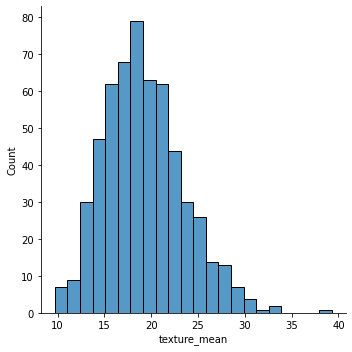

In [224]:
sb.displot(df['texture_mean'])

In [225]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

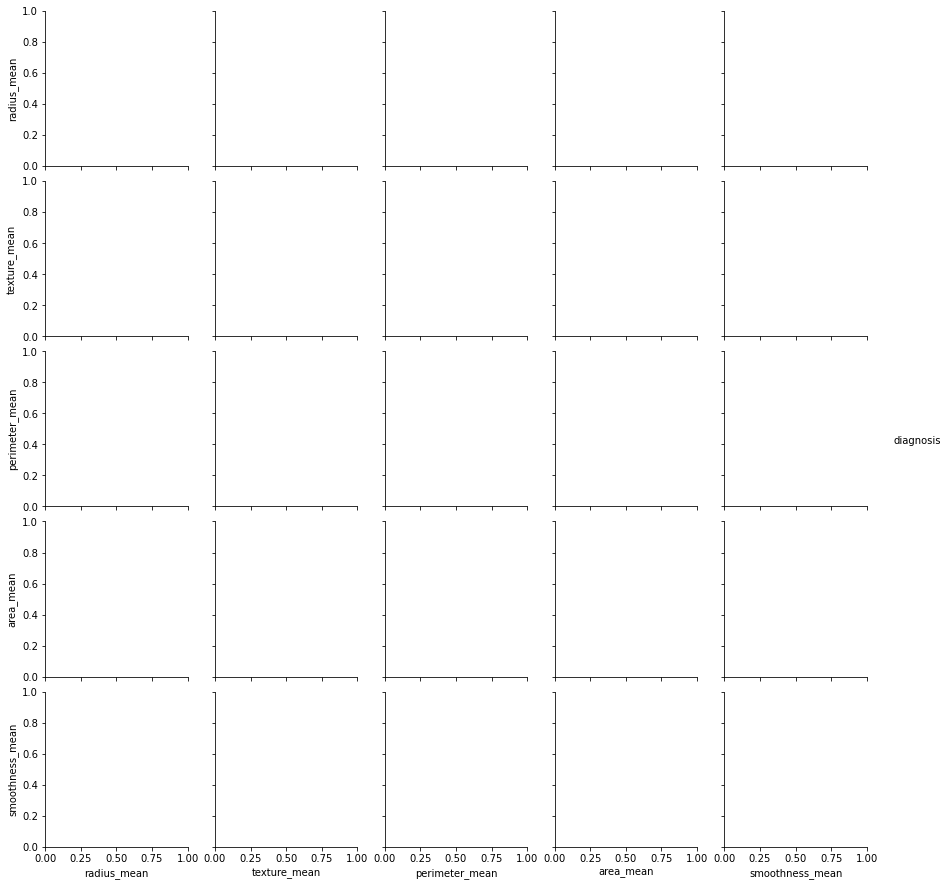

In [244]:
sb.pairplot(df, hue = 'diagnosis', vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'])


In [227]:
# save the cleaned data to a new file
df.to_csv('dataset_clean.csv', index=False)

# load the cleaned data
df = pandas.read_csv('dataset_clean.csv')

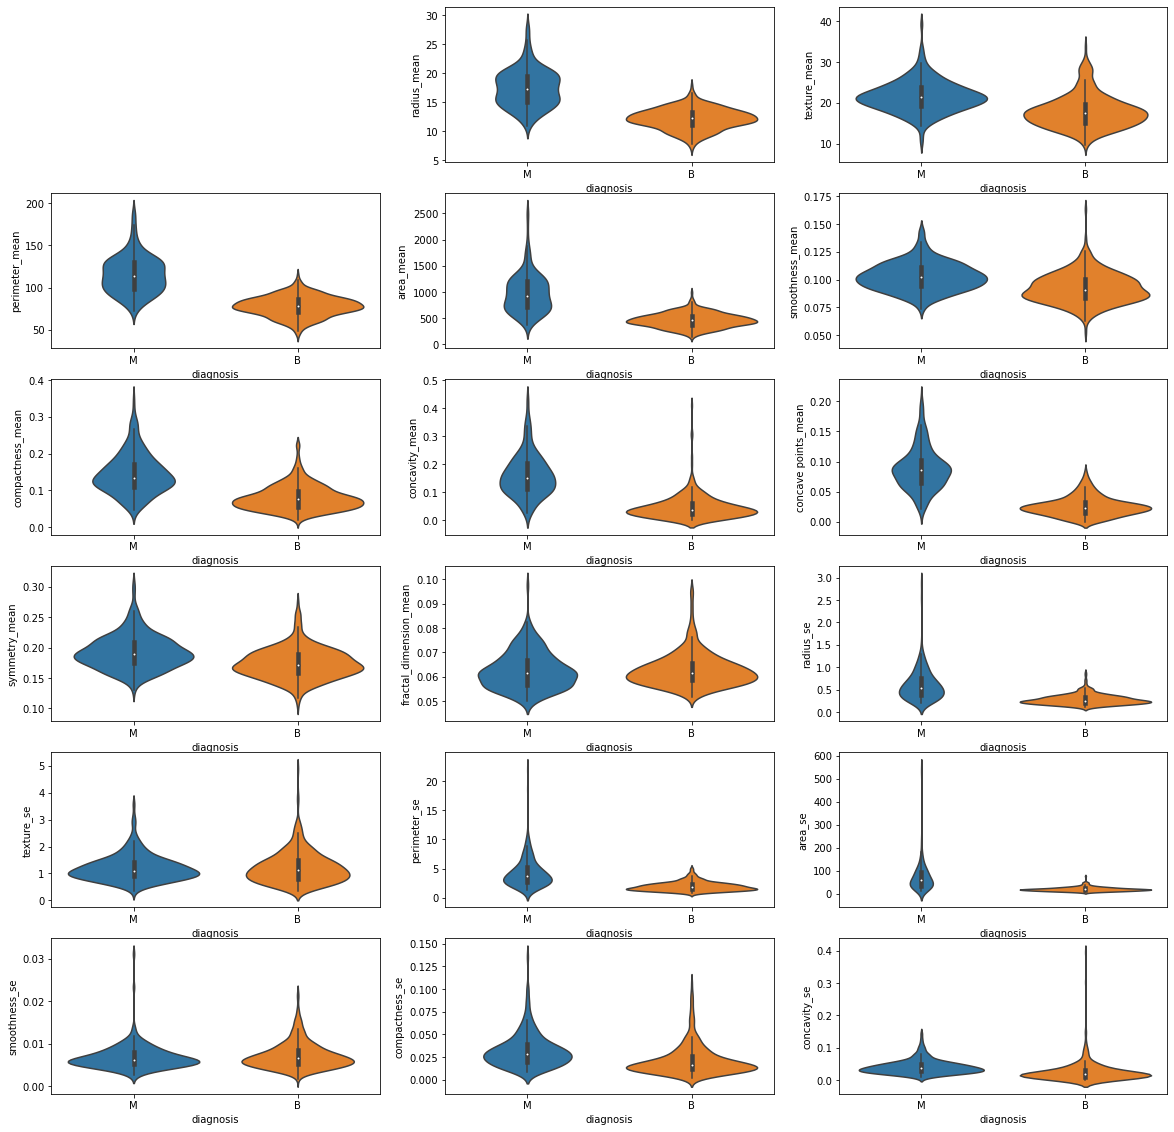

In [228]:
plt.figure(figsize=(20, 20))

for column_index, column in enumerate(df.columns):
    try:
        if column == 'diagnosis':
            continue
        plt.subplot(6, 3, column_index + 1)
        sb.violinplot(x='diagnosis', y=column, data=df)
    except:
        pass

array([[<AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>],
       [<AxesSubplot:title={'center':'radius_se'}>,
        <AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>],
       [<AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>,
        <AxesSubplot:title={'center':'concav

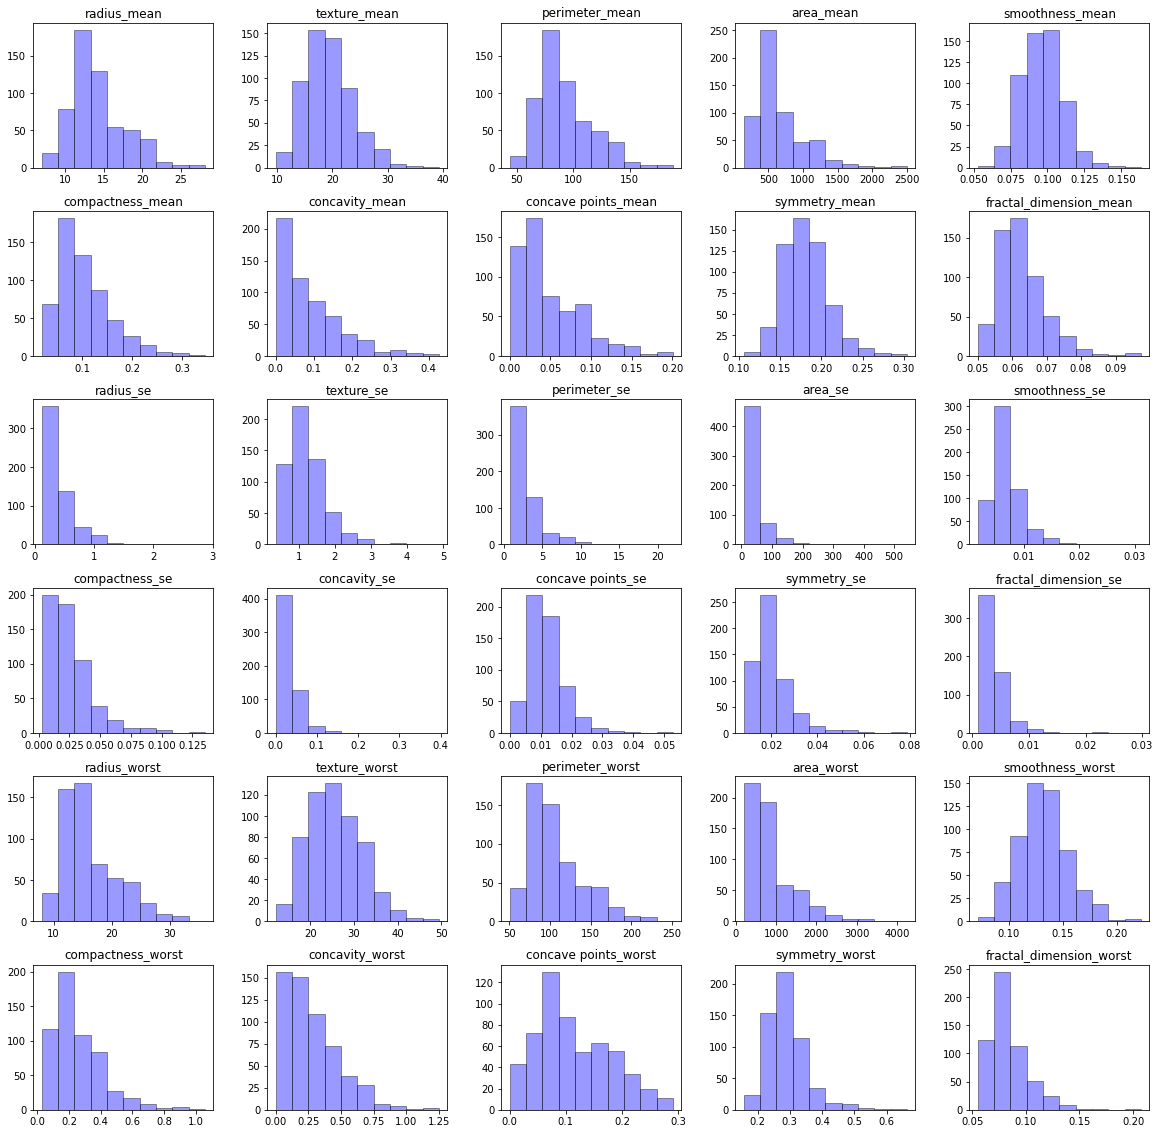

In [229]:
# Making histograms for each attribute for both diagnosis types
df.hist(figsize=(20, 20), color='blue', edgecolor='black', alpha=0.4, bins=10, grid=False)

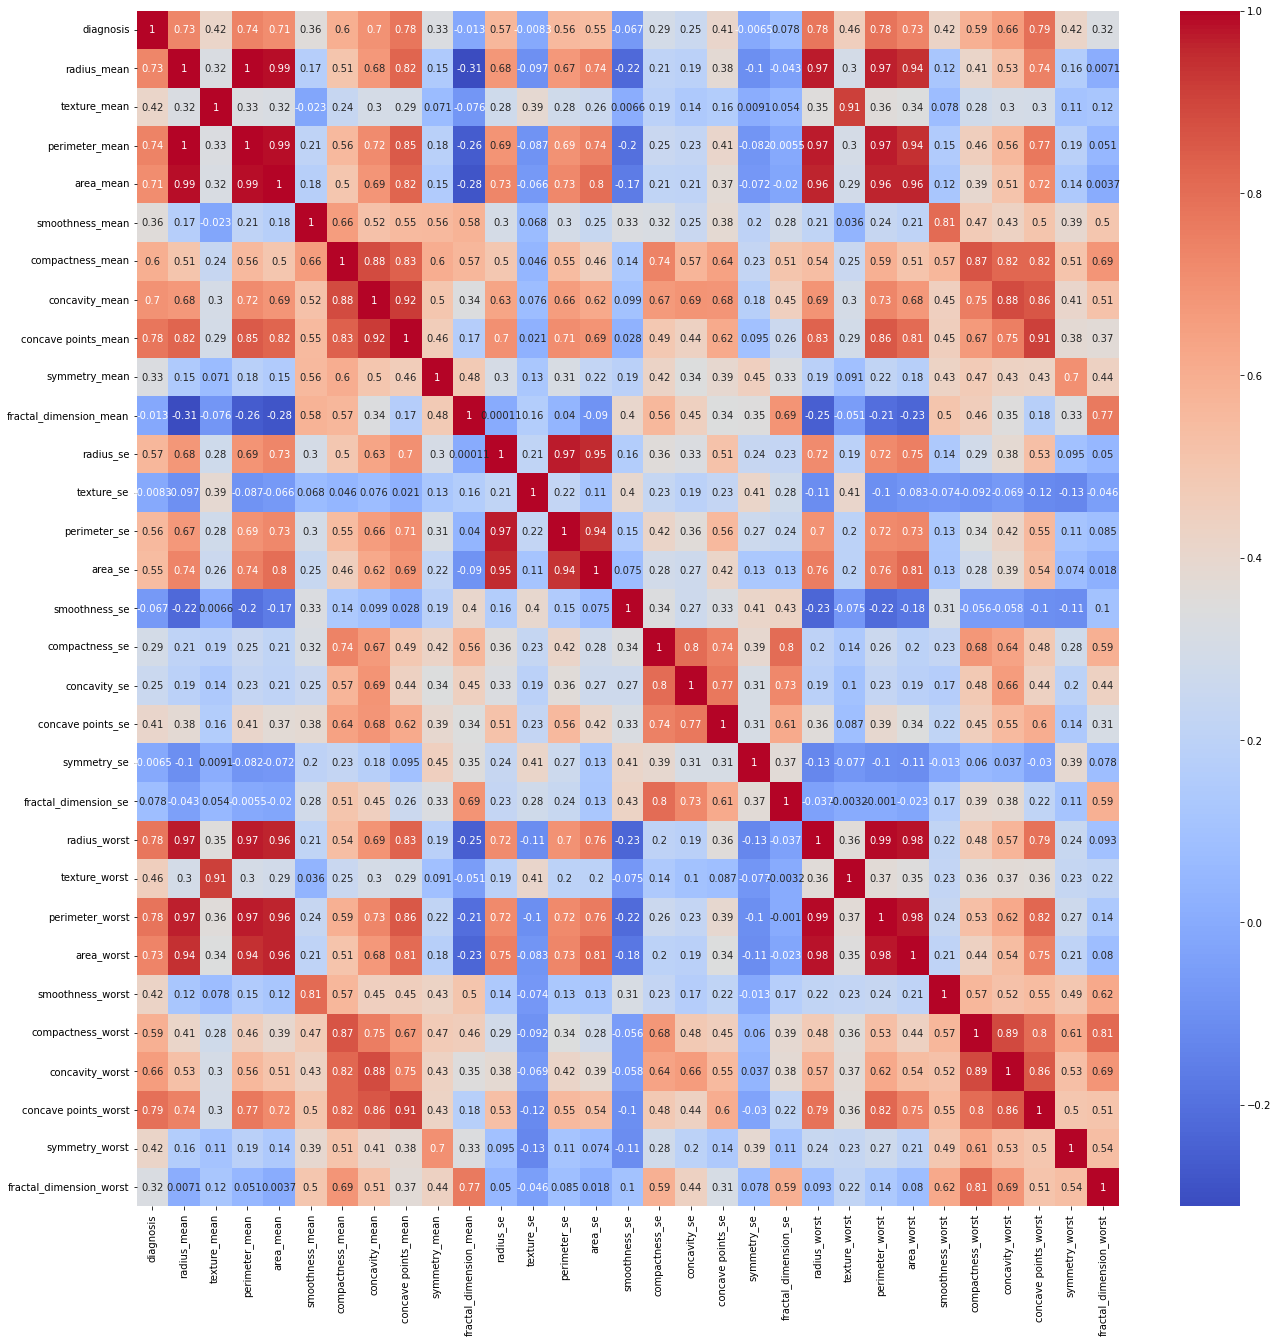

In [230]:
# calculate the correlation between each pair of columns
df['diagnosis'] = df['diagnosis'].map({'B' : 0, 'M' : 1}) # Swapping B and M for 0 and 1
corr_matrix = df.corr(numeric_only=True)

# plot the correlation matrix as a heatmap
fig, ax = plt.subplots(figsize=(22, 22))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

In [231]:
# get the correlation between the diagnosis and each column
corr_matrix = df.corr(numeric_only=True)
corr_matrix['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

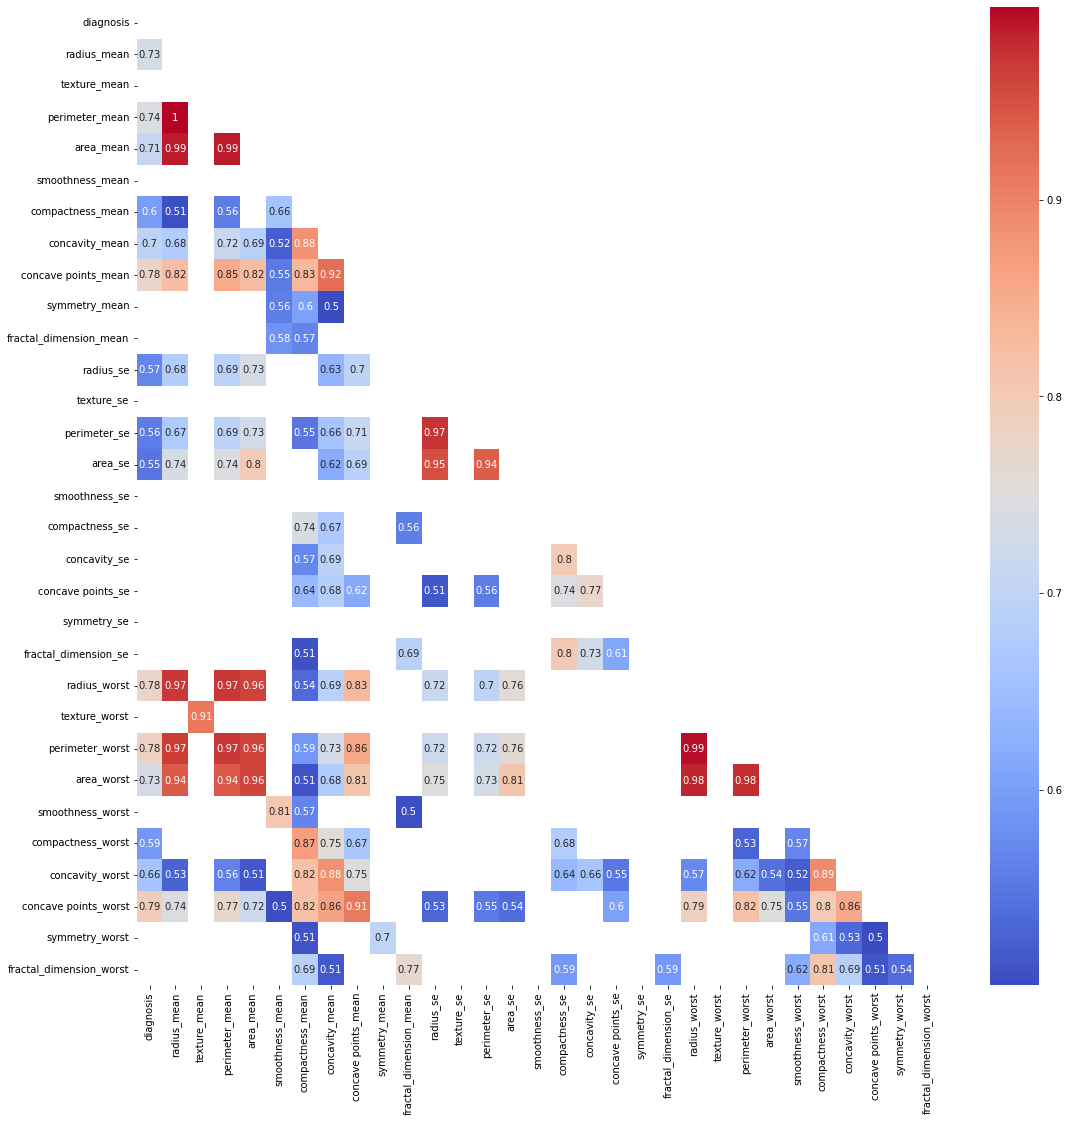

In [232]:
# Get all correlations pairs above 0.5 and below -0.5
corr_matrix = df.corr(numeric_only=True)
corr_matrix = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]

# Plot onlly the lower triangle of the correlation matrix
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(18, 18))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax, mask=mask)
plt.show()


# TODO : REMove duplicates with df.drop_duplicates()

In [267]:
# Get the most valuable features

# Split the data into features and labels
df = pandas.read_csv('dataset.csv')
df = df.drop(['id', 'Unnamed: 32'], axis=1)
df['diagnosis'] = df['diagnosis'].map({'B' : 0, 'M' : 1}) # Swapping B and M for 0 and 1

X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = tree.DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Get the feature importances
feature_importances = clf.feature_importances_

# Print the name of the most important features
for index, feature in enumerate(feature_importances):
    if feature > 0.01:
        print(X.columns[index])

# Get the most important features
important_features = []
for index, feature in enumerate(feature_importances):
    if feature > 0.05:
        important_features.append((index, feature))

# Print the most important features
print(important_features)


texture_mean
concave points_mean
area_se
concavity_se
concave points_se
radius_worst
perimeter_worst
concave points_worst
[(1, 0.05847766231107586), (7, 0.6914195549049809), (20, 0.05229926933685694), (22, 0.051493960584869665), (27, 0.06565079001137543)]


In [276]:
# Now get the 10 most important features with with RFE (Recursive Feature Elimination)

from sklearn.feature_selection import RFE

# Create a decision tree classifier
clf = tree.DecisionTreeClassifier()

# Create the RFE object and rank each pixel
rfe = RFE(estimator=clf, n_features_to_select=10, step=1)
rfe.fit(X, y)

# Get the feature importances
feature_importances = rfe.ranking_

# Print the name of the most important features
for index, feature in enumerate(feature_importances):
    if feature == 1:
        print(X.columns[index])



concave points_mean
perimeter_se
area_se
radius_worst
texture_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst


In [286]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_std)

# Print the best features names
for index, feature in enumerate(pca.components_):
    print(f'Feature {index + 1}')
    print(f' - Good: {cancer.feature_names[np.argmax(feature)]}') # Get the most important feature
    print(f' - Bad: {cancer.feature_names[np.argmin(feature)]}') # Get the least important feature


Feature 1
 - Good: mean concave points
 - Bad: smoothness error
Feature 2
 - Good: mean fractal dimension
 - Bad: mean radius
Feature 3
 - Good: texture error
 - Bad: worst symmetry
Feature 4
 - Good: mean smoothness
 - Bad: worst texture
Feature 5
 - Good: concavity error
 - Bad: mean smoothness
Feature 6
 - Good: worst symmetry
 - Bad: worst smoothness
Feature 7
 - Good: worst fractal dimension
 - Bad: concave points error
Feature 8
 - Good: smoothness error
 - Bad: texture error
Feature 9
 - Good: concavity error
 - Bad: symmetry error
Feature 10
 - Good: mean symmetry
 - Bad: symmetry error


In [233]:
# split the data into features and labels

all_inputs = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']].values
all_labels = df['diagnosis'].values

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

In [234]:
# Checking null values
print(df.isna().sum())

# check number of values that are 0
print((df == 0).sum())

# solve the problem of 0 values by replacing them with the mean for each column
df = df.replace(0, np.NaN)
df = df.fillna(df.mean())

# check number of values that are 0
print((df == 0).sum()) 


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
diagnosis                  357
radius_mean                  0
texture_mean              

In [235]:
# Threshold value to define the range for identifying outliers
threshold = 3 # bigger the value, more the outliers

# Loop through all columns in the DataFrame, excluding the diagnosis
for column in df.loc[:, ~df.columns.isin(['diagnosis'])]:  
    
    # Mean and STD of the column
    mean = df[column].mean()
    std = df[column].std()

    # Lower and Upper limits
    lower_limit = mean - threshold * std
    upper_limit = mean + threshold * std

    # Remove outliers
    df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

In [236]:
# Swapping B and M for 0 and 1
df['diagnosis'] = df['diagnosis'].map({'B' : 0, 'M' : 1})

In [237]:
df.shape

(426, 31)

In [238]:
# Threshold value to define the range for identifying outliers
threshold = 5

# Loop through all columns in the DataFrame, excluding the diagnosis
for column in df.loc[:, ~df.columns.isin(['diagnosis'])]:  
    
    # Mean and STD of the column
    mean = df[column].mean()
    std = df[column].std()

    # Lower and Upper limits
    lower_limit = mean - threshold * std
    upper_limit = mean + threshold * std

    # Remove outliers
    df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

In [239]:
x = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [240]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 5, random_state = 0)
rf.fit(training_inputs, training_classes)

RandomForestClassifier(max_depth=5, random_state=0)

In [241]:
pred = rf.predict(testing_inputs)

In [242]:
# Accuracy
print("Accuracy:", accuracy_score(testing_classes, pred))

Accuracy: 0.8951048951048951
